### Подключение библиотек и скриптов

In [265]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [266]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [267]:
print(f"Train:\t{train.shape[0]}\t sales and {train.shape[1]} features")
print(f'Test:\t{test.shape[0]}\t sales and {test.shape[1]} features')

Train:	10000	 sales and 20 features
Test:	5000	 sales and 19 features


In [268]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [269]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [270]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 3.2 MB


In [271]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 1.6 MB


In [272]:
train['Rooms'] = train['Rooms'].astype('int64')
test['Rooms'] = test['Rooms'].astype('int64')
train['HouseFloor'] = train['HouseFloor'].astype('int64')
test['HouseFloor'] = test['HouseFloor'].astype('int64')

train['Id'] = train['Id'].astype(str)
train['DistrictId'] = train['DistrictId'].astype(str)

test['Id'] = test['Id'].astype(str)
test['DistrictId'] = test['DistrictId'].astype(str)

In [273]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null object
DistrictId       10000 non-null object
Rooms            10000 non-null int64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null int64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(6), int64(9), object(5)
memory usage: 4.2 MB


### Обзор данных

**Целевая переменная**

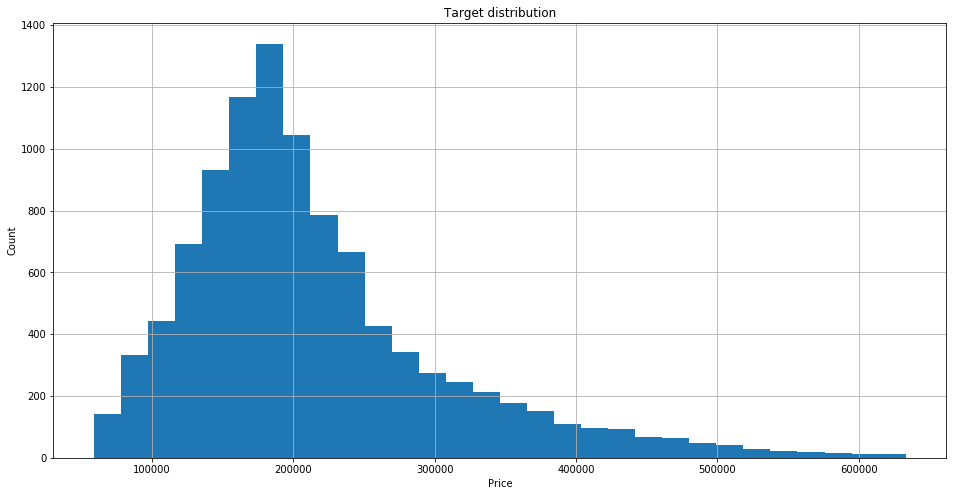

In [274]:
plt.figure(figsize = (16, 8))

train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

**Количественные переменные**

In [275]:
train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Номинативные переменные**

In [276]:
train.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [277]:
train['DistrictId'].value_counts().head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [278]:
train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [279]:
train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [280]:
train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Обработка пропусков

In [281]:
len(train) - train.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [282]:
train[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,0.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,0.0
8,64.511437,NaN,1.0
9,46.461409,18.915552,8.0


In [283]:
train['LifeSquare'].median()

32.781260192155735

In [284]:
square_med_diff = (train.loc[train['LifeSquare'].notnull(), 'Square'] -\
                   train.loc[train['LifeSquare'].notnull(), 'LifeSquare'] -\
                   train.loc[train['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

11.367616594611988

In [285]:
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] =\
train.loc[train['LifeSquare'].isnull(), 'Square'] -\
train.loc[train['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [286]:
train['LifeSquare'].median()

34.07875068709657

In [287]:
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].median()

In [288]:
len(train) - train.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [289]:
len(test) - test.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [290]:
test.loc[test['LifeSquare'].isnull(), 'LifeSquare'] =\
test.loc[test['LifeSquare'].isnull(), 'Square'] -\
test.loc[test['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [291]:
test['LifeSquare'].median()

34.32553041677549

In [292]:
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = train['Healthcare_1'].median()

In [293]:
len(test) - test.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

### Обработка выбросов

**Rooms**

In [294]:
train['Rooms'].value_counts()

2     3880
1     3705
3     2235
4      150
5       18
0        8
10       2
6        1
19       1
Name: Rooms, dtype: int64

In [295]:
test['Rooms'].value_counts()

2     2030
1     1769
3     1099
4       90
5        7
6        2
0        2
17       1
Name: Rooms, dtype: int64

In [296]:
train.loc[train['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10,59.056975,36.223072,10.0,22,22,2002,0.090799,B,B,74,19083,2,900.0,5,15,B,317265.323792
1454,8491,1,19,42.006046,21.779288,7.0,17,17,2014,0.007122,B,B,1,264,0,900.0,0,1,B,78364.616704
8849,14865,9,10,60.871266,38.420681,10.0,3,2,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [297]:
test.loc[test['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17,52.866107,32.528342,8.0,15,17,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [298]:
train.loc[train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0,138.427694,136.215499,0.0,4,3,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1981,7917,27,0,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2269,7317,27,0,41.790881,30.423265,0.0,13,0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,98129.976788
3911,770,28,0,49.483501,38.115885,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,70.123830,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,900.0,3,9,B,158998.110646
8834,9443,27,0,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,219281.918007


In [299]:
test.loc[test['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0,116.824201,113.692424,0.0,3,3,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0,76.345154,42.820796,12.0,14,0,1977,0.017647,B,B,2,469,0,900.0,0,0,B


In [300]:
mean_square_per_room = train['LifeSquare'].mean() / train['Rooms'].mean()

print(mean_square_per_room)

20.83972318283861


In [301]:
train.loc[train['Rooms'] > 6, 'Rooms'] = (train.loc[train['Rooms'] > 6, 'LifeSquare'] // mean_square_per_room).astype('int')
train.loc[train['Rooms'] == 0, 'Rooms'] = (train.loc[train['Rooms'] == 0, 'LifeSquare'] // mean_square_per_room).astype('int')

test.loc[test['Rooms'] > 6, 'Rooms'] = (test.loc[test['Rooms'] > 6, 'LifeSquare'] // mean_square_per_room).astype('int')
test.loc[train['Rooms'] == 0, 'Rooms'] = (test.loc[test['Rooms'] == 0, 'LifeSquare'] // mean_square_per_room).astype('int')

In [302]:
train['Rooms'].value_counts()

2     3880
1     3710
3     2236
4      151
5       18
6        2
0        2
10       1
Name: Rooms, dtype: int64

In [303]:
test['Rooms'].value_counts()

2.0    2030
1.0    1769
3.0    1099
4.0      90
5.0       7
0.0       2
6.0       2
Name: Rooms, dtype: int64

In [304]:
train.loc[train['Rooms'] == 0, 'Rooms'] = 1
test.loc[test['Rooms'] == 0, 'Rooms'] = 1

In [305]:
train['Rooms'].value_counts()

2     3880
1     3712
3     2236
4      151
5       18
6        2
10       1
Name: Rooms, dtype: int64

In [306]:
test['Rooms'].value_counts()

2.0    2030
1.0    1771
3.0    1099
4.0      90
5.0       7
6.0       2
Name: Rooms, dtype: int64

**Square, LifeSquare, KitchenSquare**

In [307]:
train = train[train['Square'].isnull() |
                    (train['Square'] < train['Square'].quantile(.99)) &
                    (train['Square'] > train['Square'].quantile(.01))]

train = train[train['LifeSquare'].isnull() |
                    (train['LifeSquare'] < train['LifeSquare'].quantile(.99)) &
                    (train['LifeSquare'] > train['LifeSquare'].quantile(.01))]

train = train[train['KitchenSquare'].isnull() |
                    (train['KitchenSquare'] < train['KitchenSquare'].quantile(.99))]

In [308]:
train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9.497000e+03,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,1.874908,54.952726,37.624186,5.679162,8.511214,12.651258,4.095867e+03,0.119641,24.978941,5410.049173,8.049384,1026.860061,1.327156,4.268927,212206.549897
std,0.794581,16.090030,15.610958,3.708261,5.171522,6.609544,2.057414e+05,0.119785,17.509733,4006.669469,23.749047,749.156155,1.483713,4.798939,88996.756876
min,1.000000,29.719934,3.489694,0.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.775449,25.035355,1.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,810.000000,0.000000,1.000000,154310.613819
50%,2.000000,52.000335,34.003958,6.000000,7.000000,14.000000,1.977000e+03,0.075779,25.000000,5288.000000,2.000000,900.000000,1.000000,3.000000,191800.737823
75%,2.000000,64.997874,47.070334,9.000000,12.000000,17.000000,1.999000e+03,0.195781,36.000000,7287.000000,5.000000,1015.000000,2.000000,6.000000,247204.817174
max,6.000000,117.855969,89.991037,14.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [309]:
train.shape

(9497, 20)

**HouseFloor, Floor**

In [310]:
train['HouseFloor'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  32,  37,  38,  39,  40,  44,  45,  48,
        99, 117])

In [311]:
test['HouseFloor'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 36, 37, 39, 40, 48, 99])

In [312]:
train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [313]:
test['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 46,
       78])

In [314]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train.loc[train['HouseFloor'] == 0, 'Floor'] + 1
test.loc[test['HouseFloor'] == 0, 'HouseFloor'] = test.loc[test['HouseFloor'] == 0, 'Floor'] + 1

In [315]:
train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3,80.384479,46.683720,12.0,5,17,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2,62.254114,37.160377,7.0,3,5,1960,0.460556,B,B,20,4386,14,900.0,1,5,B,296021.204377
7,11993,74,2,80.312926,68.945309,0.0,14,15,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
8,5172,1,2,64.511437,52.143821,1.0,9,17,1977,0.007122,B,B,1,264,0,900.0,0,1,B,229102.795999
9,8649,23,1,46.461409,18.915552,8.0,13,17,2014,0.075779,B,B,6,1437,3,900.0,0,2,B,95380.220993


In [316]:
test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,56.895567,1.0,6,1,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17,2017,0.072158,B,B,2,629,1,900.0,0,0,A
5,7633,53,1.0,40.675627,28.308010,1.0,21,21,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17,1997,0.041116,B,B,53,14892,4,900.0,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [317]:
train.loc[train['HouseFloor'] - train['Floor'] < 0].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
14,10953,27,1,53.769097,52.408027,1.0,5,4,1977,0.072158,B,B,2,629,1,900.0,0,0,A,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,5,1983,0.051815,B,B,5,1227,0,900.0,0,0,B,117000.381287
21,11935,27,2,64.711835,52.344218,1.0,15,1,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,127200.026511
35,6486,200,3,85.280389,58.447967,9.0,6,5,1960,0.000000,B,B,33,7425,1,900.0,2,5,B,402871.916317
51,10103,94,1,35.280894,23.354176,6.0,11,9,1971,0.282798,B,B,33,8667,2,900.0,0,6,B,148862.210174
67,8443,57,2,45.964890,29.141212,5.0,7,5,1963,0.133215,B,B,49,11395,3,1406.0,3,4,A,180538.898922
68,1063,77,1,42.678844,23.918634,8.0,14,12,1983,0.000070,B,B,46,10309,1,240.0,1,16,B,179784.473334
72,14675,74,1,52.457589,52.423345,0.0,18,17,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,160292.163702
76,14020,34,1,47.909327,42.782385,1.0,2,1,2016,0.069753,B,B,53,13670,4,900.0,1,11,B,181167.642404
87,16674,94,2,47.145626,30.738284,5.0,11,9,1976,0.127376,B,B,43,8429,3,900.0,3,9,B,210364.314719


In [318]:
test.loc[test['HouseFloor'] - test['Floor'] < 0].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,56.895567,1.0,6,1,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
10,15975,61,3.0,64.543658,42.651541,7.0,10,9,1981,0.300323,B,B,52,10311,6,900.0,1,9,B
14,5214,27,1.0,37.555197,25.187580,1.0,5,1,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
27,11160,58,1.0,48.610661,48.752502,1.0,4,3,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
36,9348,205,1.0,37.480811,16.851795,8.0,6,5,1933,0.169091,B,B,19,3856,10,900.0,2,5,B
41,12749,21,2.0,49.011976,27.980195,5.0,6,5,1969,0.194489,B,B,47,8004,3,125.0,3,5,B
55,5452,27,1.0,48.587913,42.596190,12.0,3,2,2016,0.017647,B,B,2,469,0,900.0,0,0,B
58,2831,21,1.0,21.452899,15.798509,3.0,11,9,1972,0.194489,B,B,47,8004,3,125.0,3,5,B
59,10614,27,1.0,44.254995,31.887378,1.0,3,1,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
65,10929,48,1.0,40.767892,37.236548,1.0,20,19,2017,0.041125,B,B,46,9515,5,900.0,1,10,B


In [319]:
train.loc[train['HouseFloor'] - train['Floor'] < 0, 'HouseFloor'] = train.loc[train['HouseFloor'] - train['Floor'] < 0, 'Floor'] 

In [320]:
test.loc[test['HouseFloor'] - test['Floor'] < 0, 'HouseFloor'] = test.loc[test['HouseFloor'] - test['Floor'] < 0, 'Floor']

**HouseYear**

In [321]:
train['HouseYear'].sort_values(ascending=False).head()

1497    20052011
4189        4968
1499        2020
3485        2020
8253        2020
Name: HouseYear, dtype: int64

In [322]:
train['HouseYear'].sort_values(ascending=False).tail()

5053    1917
1380    1917
8144    1917
7611    1916
910     1914
Name: HouseYear, dtype: int64

In [323]:
test['HouseYear'].sort_values(ascending=False).head()

4389    2020
4273    2020
888     2020
3255    2020
1039    2020
Name: HouseYear, dtype: int64

In [324]:
test['HouseYear'].sort_values(ascending=False).tail()

1475    1912
64      1911
2691    1910
2       1909
3253    1908
Name: HouseYear, dtype: int64

In [325]:
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = 2011

### Построение новых признаков

**Dummies**

In [326]:
train['Ecology_2_bin'] = train['Ecology_2'].replace({'A':0, 'B':1})
train['Ecology_3_bin'] = train['Ecology_3'].replace({'A':0, 'B':1})
train['Shops_2_bin'] = train['Shops_2'].replace({'A':0, 'B':1})

test['Ecology_2_bin'] = test['Ecology_2'].replace({'A':0, 'B':1})
test['Ecology_3_bin'] = test['Ecology_3'].replace({'A':0, 'B':1})
test['Shops_2_bin'] = test['Shops_2'].replace({'A':0, 'B':1})

**MedPriceByDistrict**

In [327]:
med_price_by_district = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1,147258.736617
1,0,2,176210.812334
2,0,3,300610.359425
3,1,1,146271.160982
4,1,2,202626.530012


In [328]:
train = train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,...,5,900.0,0,11,B,184966.930730,1,1,1,207786.135836
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,263206.223152
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,166809.665642
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,158791.017955


In [329]:
len(train) - train.count()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
MedPriceByDistrict    0
dtype: int64

In [330]:
test = test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
0,725,58,2.0,49.882643,33.432782,6.0,6,14,1972,0.310199,...,2748,1,900.0,0,0,B,1,1,1,166809.665642
1,15856,74,2.0,69.263183,56.895567,1.0,6,6,1977,0.075779,...,1437,3,900.0,0,2,B,1,1,1,243031.695525
2,5480,190,1.0,13.597819,15.948246,12.0,2,5,1909,0.000000,...,7538,87,4702.0,5,5,B,1,1,1,NaN
3,15664,47,2.0,73.046609,51.940842,9.0,22,22,2007,0.101872,...,4583,3,900.0,3,3,B,1,1,1,222227.584211
4,14275,27,1.0,47.527111,43.387569,1.0,17,17,2017,0.072158,...,629,1,900.0,0,0,A,1,1,0,119443.814919


In [331]:
len(test) - test.count()

Id                     0
DistrictId             0
Rooms                  1
Square                 0
LifeSquare             0
KitchenSquare          0
Floor                  0
HouseFloor             0
HouseYear              0
Ecology_1              0
Ecology_2              0
Ecology_3              0
Social_1               0
Social_2               0
Social_3               0
Healthcare_1           0
Helthcare_2            0
Shops_1                0
Shops_2                0
Ecology_2_bin          0
Ecology_3_bin          0
Shops_2_bin            0
MedPriceByDistrict    80
dtype: int64

In [332]:
test.loc[test['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = train['MedPriceByDistrict'].median()

In [333]:
len(test) - test.count()

Id                    0
DistrictId            0
Rooms                 1
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
MedPriceByDistrict    0
dtype: int64

In [334]:
test.loc[test['Rooms'].isnull(), 'Rooms'] = train['Rooms'].median()

In [335]:
len(test) - test.count()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
MedPriceByDistrict    0
dtype: int64

### Отбор признаков

In [336]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'MedPriceByDistrict']

In [337]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
             'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
             'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin', 'MedPriceByDistrict']

target_name = ['Price']


### Разбиение на train и test

In [338]:
X = pd.DataFrame(train, columns=feature_names)

X.head()


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,MedPriceByDistrict
0,2,47.981561,29.442751,6.0,7,9,1969,0.089040,1,1,33,7976,5,900.0,0,11,1,207786.135836
1,3,65.683640,40.049543,8.0,7,9,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,2,44.947953,29.197612,0.0,8,12,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,263206.223152
3,2,53.352981,52.731512,9.0,8,17,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,166809.665642
4,1,39.649192,23.776169,7.0,11,12,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,158791.017955


In [339]:
y = pd.DataFrame(train, columns=target_name)
y.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [340]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497 entries, 0 to 9496
Data columns (total 18 columns):
Rooms                 9497 non-null int64
Square                9497 non-null float64
LifeSquare            9497 non-null float64
KitchenSquare         9497 non-null float64
Floor                 9497 non-null int64
HouseFloor            9497 non-null int64
HouseYear             9497 non-null int64
Ecology_1             9497 non-null float64
Ecology_2_bin         9497 non-null int64
Ecology_3_bin         9497 non-null int64
Social_1              9497 non-null int64
Social_2              9497 non-null int64
Social_3              9497 non-null int64
Healthcare_1          9497 non-null float64
Helthcare_2           9497 non-null int64
Shops_1               9497 non-null int64
Shops_2_bin           9497 non-null int64
MedPriceByDistrict    9497 non-null float64
dtypes: float64(6), int64(12)
memory usage: 1.4 MB


In [341]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497 entries, 0 to 9496
Data columns (total 1 columns):
Price    9497 non-null float64
dtypes: float64(1)
memory usage: 148.4 KB


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

### Построение модели

**Обучение и оценка модели**

In [343]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split


In [344]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [345]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [346]:
y_pred = model.predict(X_test)

check_test = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
4438,155776.930996,172955.204745
745,153632.338496,146078.828344
8601,200516.187477,183510.612523
2476,201428.740006,192861.525958
8192,140427.999380,130680.067095
4834,262616.842537,240995.696458
6968,184799.765395,204088.462049
8661,260147.281820,382362.379100
4639,168195.537094,180697.382097
8352,138724.567945,142562.819171


In [347]:
R2 = metrics.r2_score(y_test, y_pred)

R2

0.7297031379340633

In [348]:
cv_score = cross_val_score(model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.73932414, 0.74915902, 0.75740798])

In [349]:
cv_score.mean()

0.7486303779238227

**Предсказание**

In [350]:
X_from_test = pd.DataFrame(test, columns=feature_names)

X_from_test.head()



,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,MedPriceByDistrict
0,2.0,49.882643,33.432782,6.0,6,14,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,166809.665642
1,2.0,69.263183,56.895567,1.0,6,6,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,243031.695525
2,1.0,13.597819,15.948246,12.0,2,5,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,195641.106322
3,2.0,73.046609,51.940842,9.0,22,22,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,222227.584211
4,1.0,47.527111,43.387569,1.0,17,17,2017,0.072158,1,1,2,629,1,900.0,0,0,0,119443.814919


In [351]:
X_from_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Rooms                 5000 non-null float64
Square                5000 non-null float64
LifeSquare            5000 non-null float64
KitchenSquare         5000 non-null float64
Floor                 5000 non-null int64
HouseFloor            5000 non-null int64
HouseYear             5000 non-null int64
Ecology_1             5000 non-null float64
Ecology_2_bin         5000 non-null int64
Ecology_3_bin         5000 non-null int64
Social_1              5000 non-null int64
Social_2              5000 non-null int64
Social_3              5000 non-null int64
Healthcare_1          5000 non-null float64
Helthcare_2           5000 non-null int64
Shops_1               5000 non-null int64
Shops_2_bin           5000 non-null int64
MedPriceByDistrict    5000 non-null float64
dtypes: float64(7), int64(11)
memory usage: 742.2 KB


In [352]:
test['Price'] = model.predict(X_from_test)

In [353]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14,1972,0.310199,...,1,900.0,0,0,B,1,1,1,166809.665642,161915.950946
1,15856,74,2.0,69.263183,56.895567,1.0,6,6,1977,0.075779,...,3,900.0,0,2,B,1,1,1,243031.695525,236996.037211
2,5480,190,1.0,13.597819,15.948246,12.0,2,5,1909,0.000000,...,87,4702.0,5,5,B,1,1,1,195641.106322,149860.147148
3,15664,47,2.0,73.046609,51.940842,9.0,22,22,2007,0.101872,...,3,900.0,3,3,B,1,1,1,222227.584211,314540.346978
4,14275,27,1.0,47.527111,43.387569,1.0,17,17,2017,0.072158,...,1,900.0,0,0,A,1,1,0,119443.814919,142465.048352


In [354]:
test[['Id', 'Price']].to_csv('APanfilova_predictions.csv', index=None)